In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [135]:
df.shape  # shape of data set

(1000, 39)

In [11]:
df.isnull().sum() ## finding null values 

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

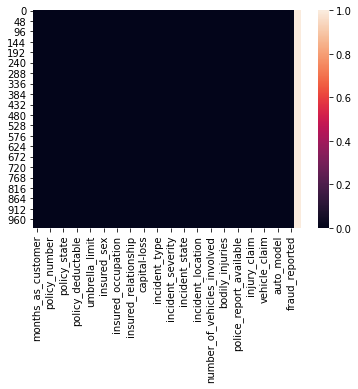

In [12]:
sb.heatmap(df.isnull()) 

In [13]:
df.drop('_c39',axis=1,inplace=True)

In [14]:
# Finding the unique values:-
for d in df.columns:
    print('The unique values of',d,df[d].unique(),'\n')

The unique values of months_as_customer [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 29

In [15]:
df.replace('?',np.nan,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [17]:
categorical=[]
continous=[]
for c in df.columns:
    if  df[c].dtype=='O':
        categorical.append(c)
    else:
        df[c].dtype!='O'
        continous.append(c)

In [18]:
len(categorical)

21

In [19]:
len(continous)

18

In [20]:
print(categorical,'\n','\n',continous)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'] 
 
 ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [21]:
cate=df[['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 
         'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 
         'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
         'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']]


conti=df[['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 
          'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
          'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]

In [22]:
conti

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


In [23]:
cate

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NaN,NaN,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,NaN,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16-07-1991,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,...,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,NaN,Honda,Accord,N
996,05-01-2014,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,...,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,NaN,Volkswagen,Passat,N
997,17-02-2003,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,...,Minor Damage,Police,NC,Arlington,7629 5th St,NaN,YES,Suburu,Impreza,N
998,18-11-2011,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,...,Major Damage,Other,NY,Arlington,6128 Elm Lane,NaN,YES,Audi,A5,N


In [24]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

<AxesSubplot:>

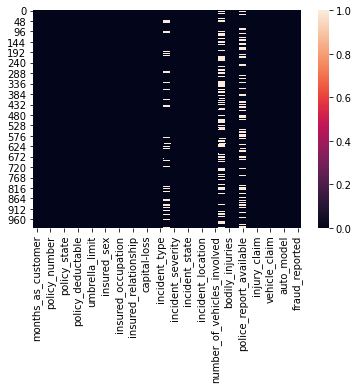

In [25]:
sb.heatmap(df.isnull()) # Some of null values are avaiable 

# Cleaning the null values

In [26]:
# As per police report most of report is not filled.
df['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [27]:
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df['police_report_available'].isnull().sum()

0

In [28]:
df['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [29]:
# As per property damage
df['property_damage'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [30]:
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])

In [31]:
df['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [32]:
# As per in collision type 
df['collision_type'].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [33]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [34]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])

In [35]:
df['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [36]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Exploratory Data Analysis

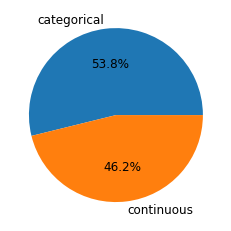

In [37]:
plt.pie([len(categorical),len(continous)],labels=['categorical','continuous'],textprops={'fontsize':12},autopct='%1.1f%%')
plt.show()

## Target column

In [38]:
o=df['fraud_reported'].value_counts()
o

N    753
Y    247
Name: fraud_reported, dtype: int64

clearly there is unbalance data

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

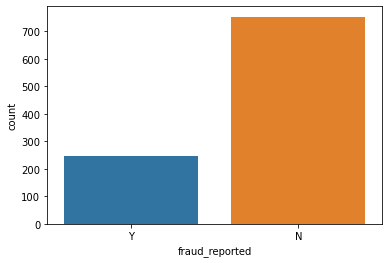

In [39]:
sb.countplot(df['fraud_reported'])

In [40]:

df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

### targetcolumns and months as customer 

<AxesSubplot:ylabel='months_as_customer'>

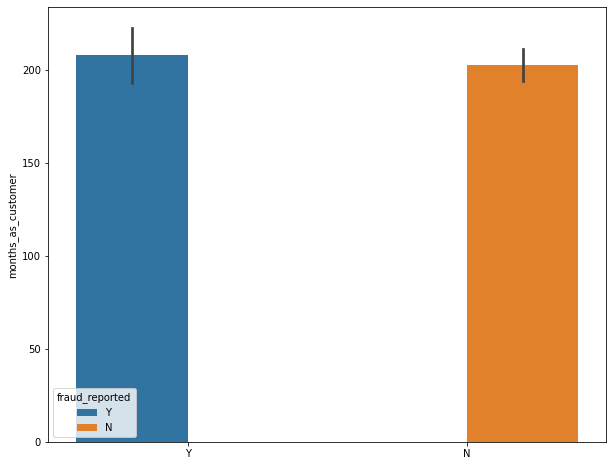

In [41]:
plt.figure(figsize=(10,8))
sb.barplot(y=df['months_as_customer'],x=df['fraud_reported'].values,hue=df['fraud_reported'])

In [42]:
g=df.groupby(['fraud_reported','age'])['policy_number'].count().unstack()

v=g.div(g.sum()).T

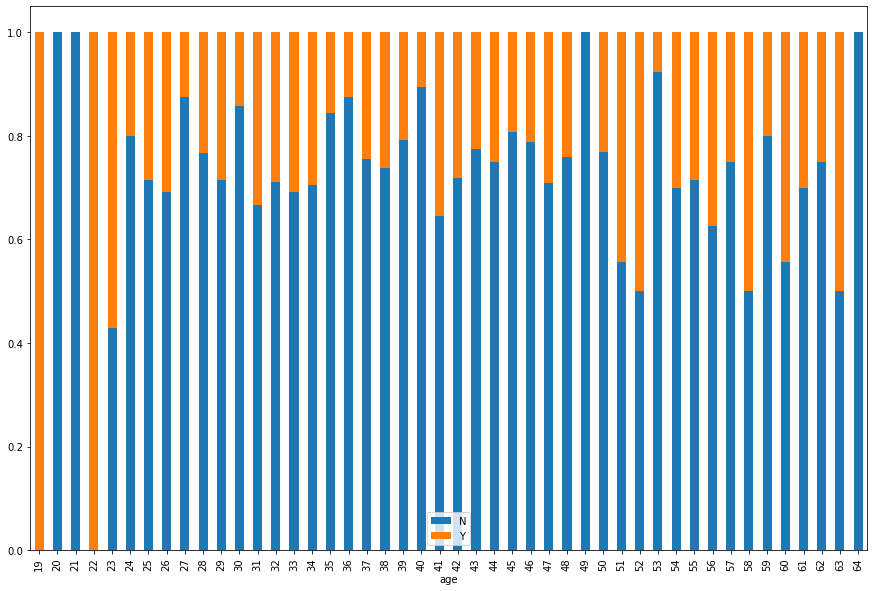

In [43]:
fig,ax=plt.subplots()
v.plot(kind='bar',figsize=(15,10),ax=ax,stacked=True)
ax.legend(loc='best')

### target columns and policy state

In [44]:
cate.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [45]:
j=df.groupby(['fraud_reported','policy_state'])['policy_number'].count().unstack()
h=j.div(j.sum()).T

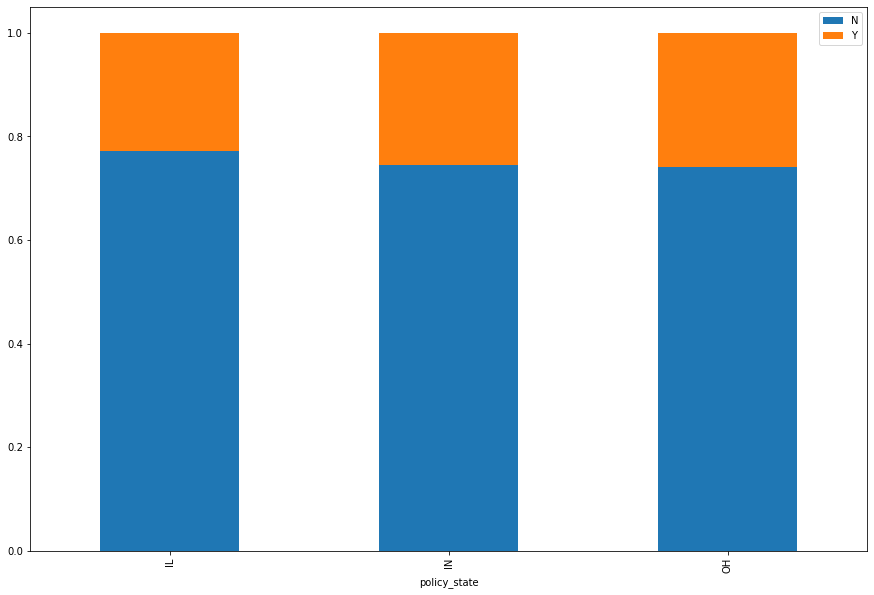

In [46]:
fig,ax=plt.subplots()
h.plot(kind='bar',figsize=(15,10),ax=ax,stacked=True)
ax.legend(loc='best')

In [47]:
cate.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [48]:
f=df.groupby(['fraud_reported','insured_occupation'])['policy_number'].count().unstack()
j=f.div(f.sum()).T

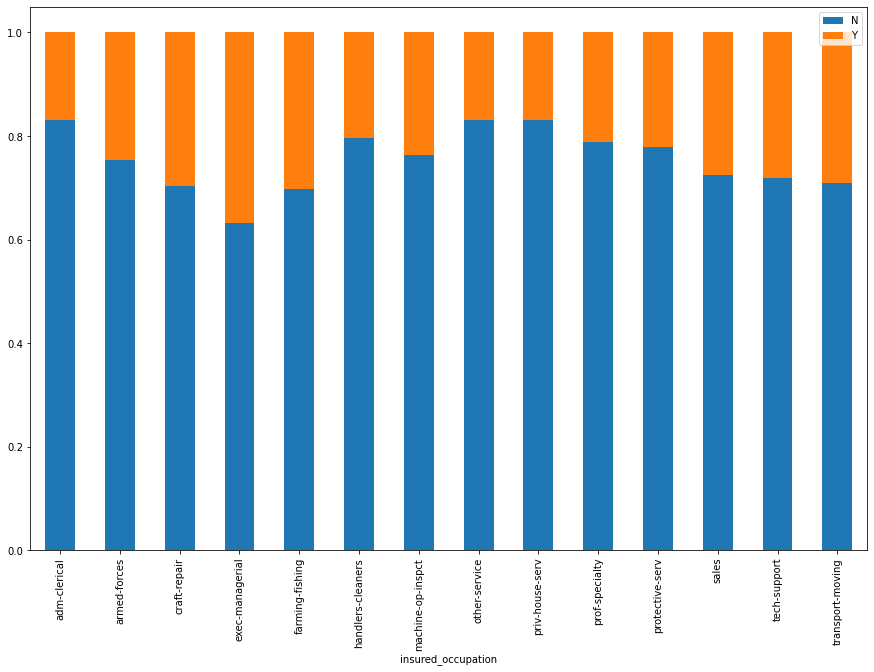

In [49]:
fig,ax=plt.subplots()
j.plot(kind='bar',figsize=(15,10),ax=ax,stacked=True)
ax.legend(loc='best')

### target columns and insured relationship

In [50]:
cate.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [51]:
f=df.groupby(['fraud_reported','insured_relationship'])['policy_number'].count().unstack()
j=f.div(f.sum()).T

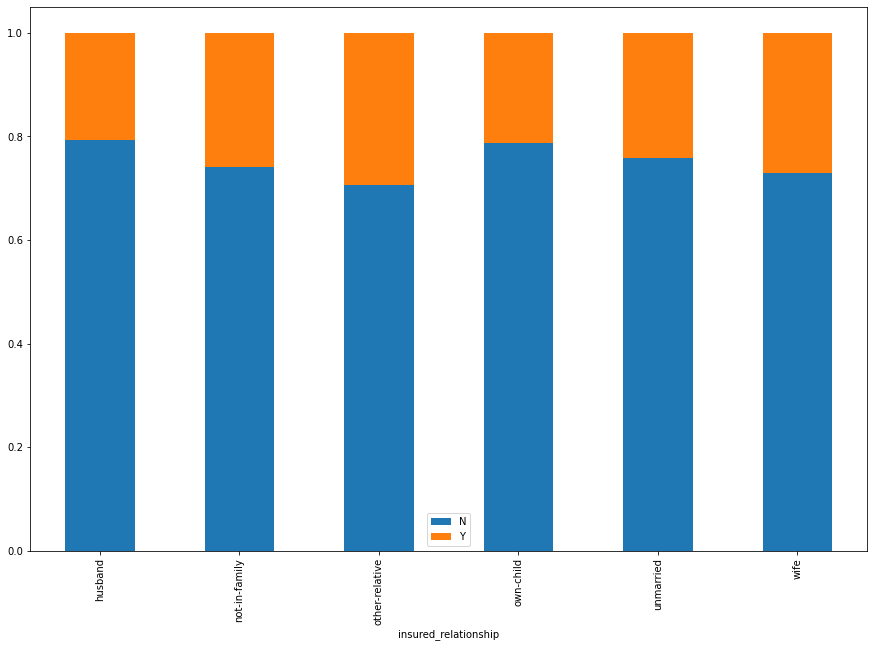

In [52]:
fig,ax=plt.subplots()
j.plot(kind='bar',figsize=(15,10),ax=ax,stacked=True)
ax.legend(loc='best')

### targetcolumns and incident type

In [53]:
cate.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

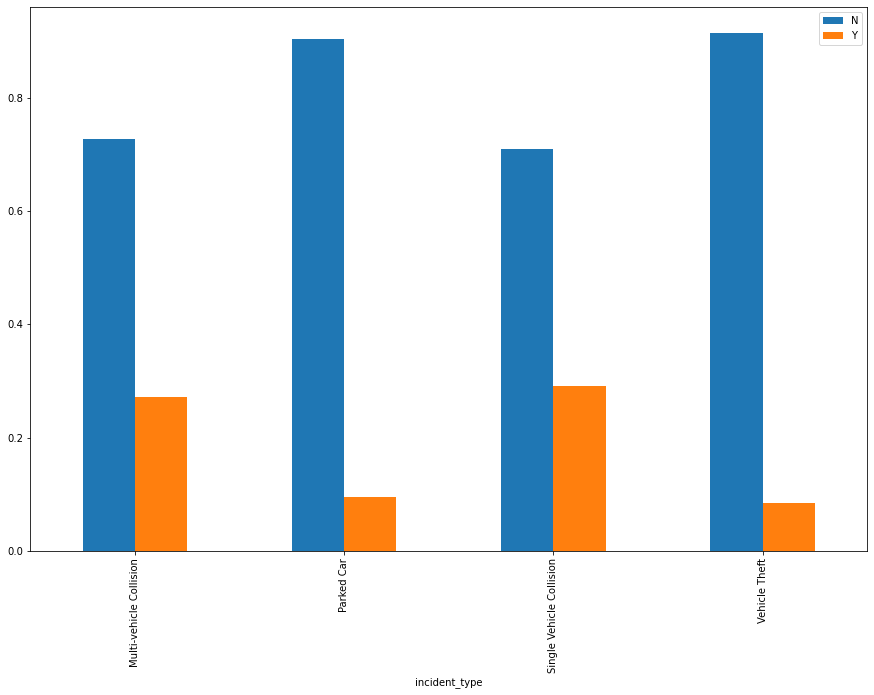

In [54]:
f=df.groupby(['fraud_reported','incident_type'])['policy_number'].count().unstack()
j=f.div(f.sum()).T
fig,ax=plt.subplots()
j.plot(kind='bar',figsize=(15,10),ax=ax)
ax.legend(loc='best')

## property damage vs target columns

In [55]:
cate.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

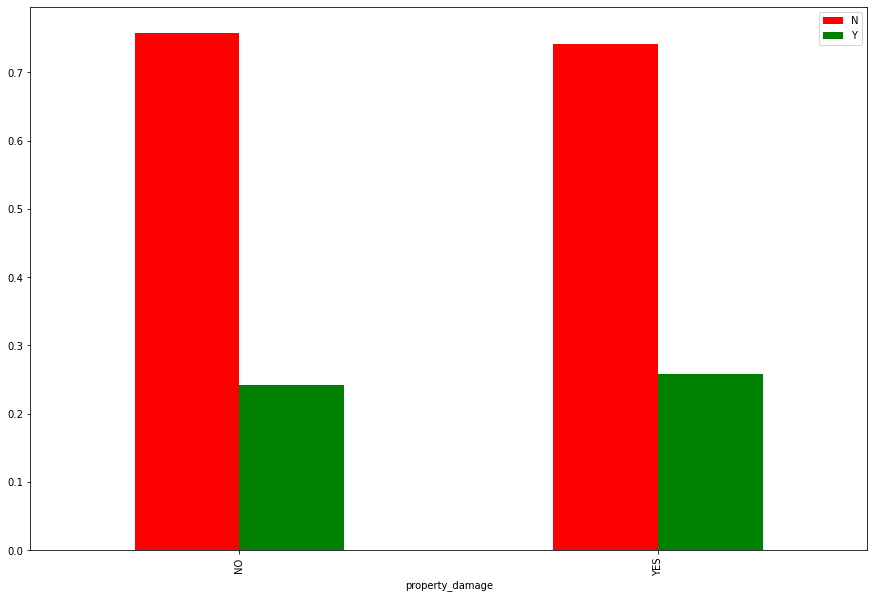

In [56]:
f=df.groupby(['fraud_reported','property_damage'])['policy_number'].count().unstack()
j=f.div(f.sum()).T
fig,ax=plt.subplots()
j.plot(kind='bar',figsize=(15,10),ax=ax,color=['r','g'])
ax.legend(loc='best')

## target columns vs authorities connected 

In [57]:
cate.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

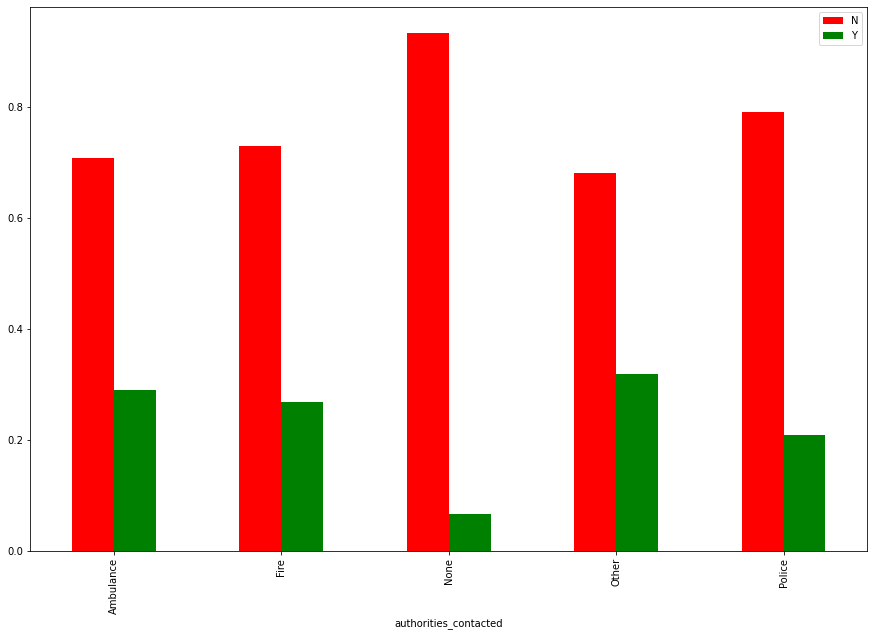

In [58]:
f=df.groupby(['fraud_reported','authorities_contacted'])['policy_number'].count().unstack()
j=f.div(f.sum()).T
fig,ax=plt.subplots()
j.plot(kind='bar',figsize=(15,10),ax=ax,color=['r','g'])
ax.legend(loc='best')

## incident_city and target columns 

In [59]:
cate.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

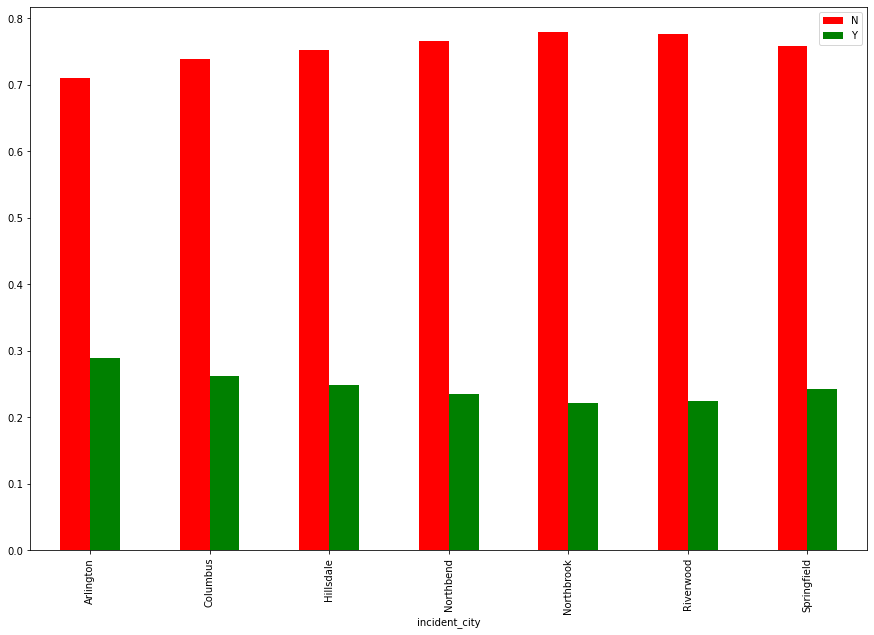

In [60]:
f=df.groupby(['fraud_reported','incident_city'])['policy_number'].count().unstack()
j=f.div(f.sum()).T
fig,ax=plt.subplots()
j.plot(kind='bar',figsize=(15,10),ax=ax,color=['r','g'])
ax.legend(loc='best')

###  auto_make and target columns

In [61]:
cate.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

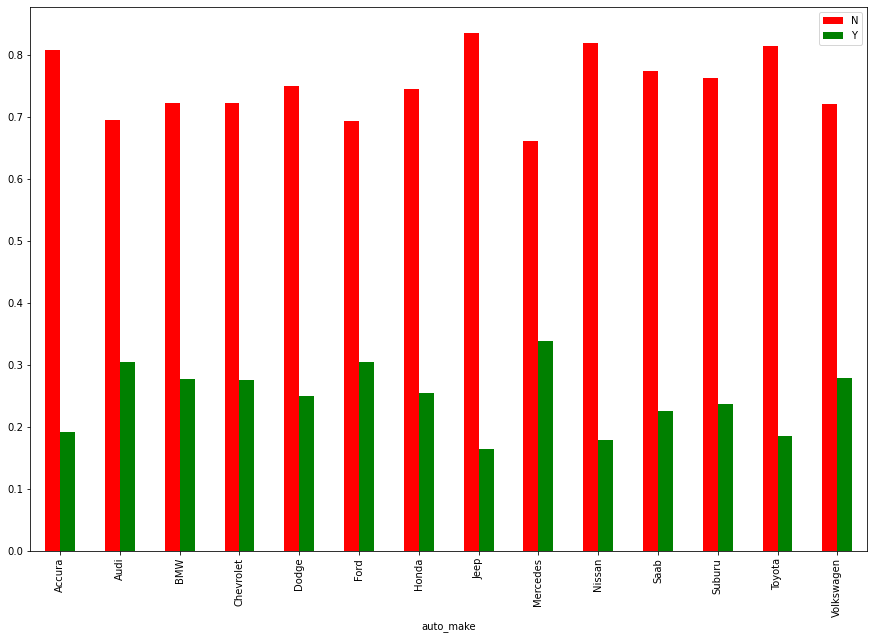

In [62]:
f=df.groupby(['fraud_reported','auto_make'])['policy_number'].count().unstack()
j=f.div(f.sum()).T
fig,ax=plt.subplots()
j.plot(kind='bar',figsize=(15,10),ax=ax,color=['r','g'])
ax.legend(loc='best')

## auto model vs target columns

In [63]:
cate.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

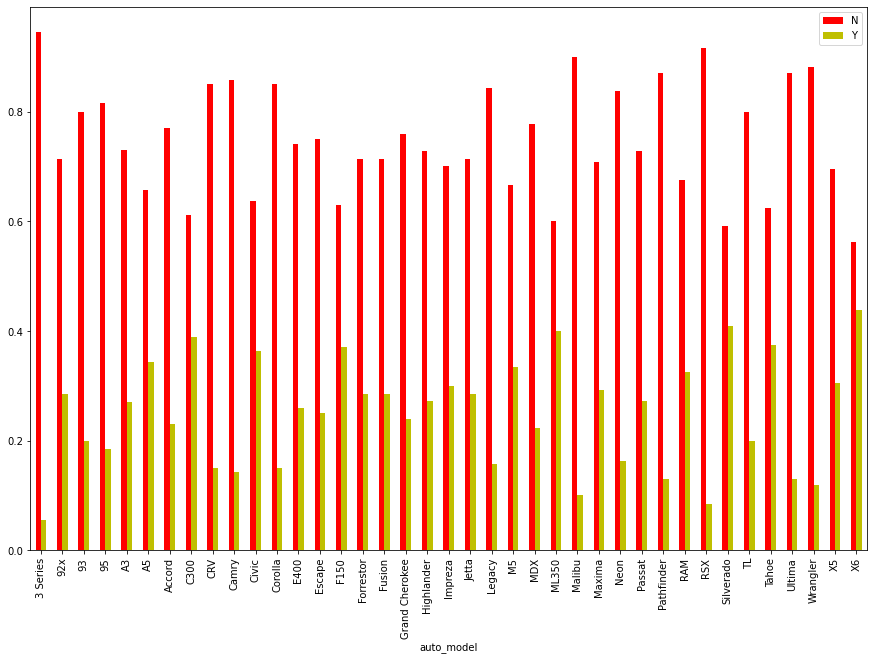

In [64]:
f=df.groupby(['fraud_reported','auto_model'])['policy_number'].count().unstack()
j=f.div(f.sum()).T
fig,ax=plt.subplots()
j.plot(kind='bar',figsize=(15,10),ax=ax,color=['r','y'])
ax.legend(loc='best')

### policy_deductable vs target columns 

In [65]:
conti.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_deductable'>

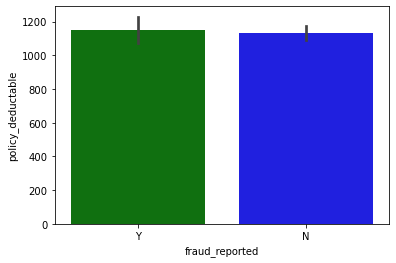

In [66]:
sb.barplot(x=df['fraud_reported'],y=df['policy_deductable'],palette=['g','b'])

## capital-gain vs target columns

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

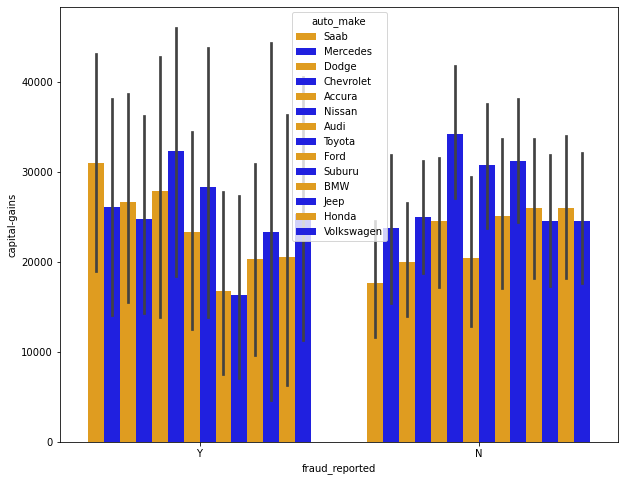

In [68]:
plt.figure(figsize=(10,8))
sb.barplot(x=df['fraud_reported'],y=df['capital-gains'],palette=['orange','b'],hue=df['auto_make'])

In [70]:
conti.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

# insured sex

In [78]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

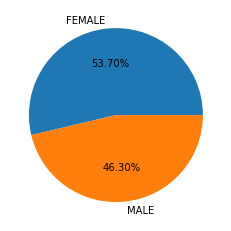

In [80]:
plt.pie(df['insured_sex'].value_counts().values,labels=df['insured_sex'].value_counts().index,autopct='%1.2f%%')
plt.show()

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

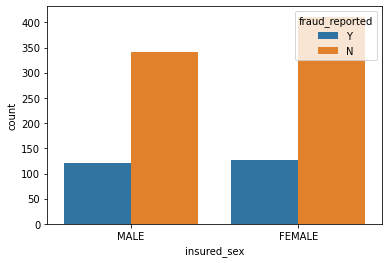

In [81]:
sb.countplot(df['insured_sex'],hue=df['fraud_reported'])

# number_of_vehicles_involved

<AxesSubplot:xlabel='fraud_reported', ylabel='number_of_vehicles_involved'>

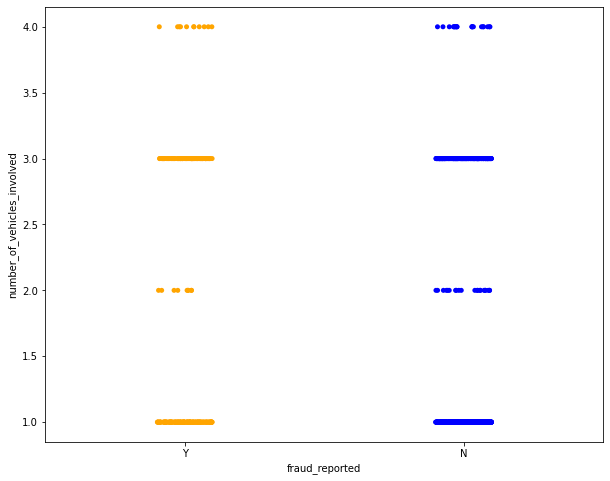

In [77]:
plt.figure(figsize=(10,8))
sb.stripplot(x=df['fraud_reported'],y=df['number_of_vehicles_involved'],palette=['orange','b'])

# umberall_limit

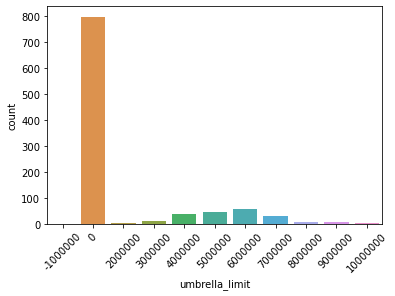

In [83]:
sb.countplot(df['umbrella_limit'])
plt.xticks(rotation=45)
plt.show()

In [84]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [85]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

# months as customer and age 

<AxesSubplot:xlabel='age', ylabel='months_as_customer'>

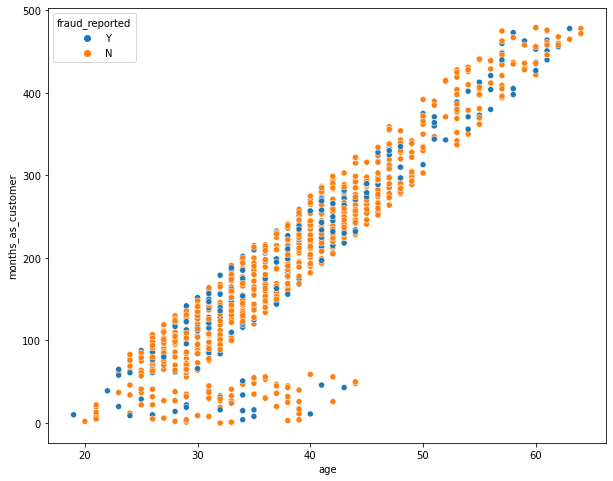

In [89]:
plt.figure(figsize=(10,8))
sb.scatterplot('age','months_as_customer',hue='fraud_reported',data=df)

## policy_deductable and policy_annual_premium

<AxesSubplot:xlabel='policy_deductable', ylabel='policy_annual_premium'>

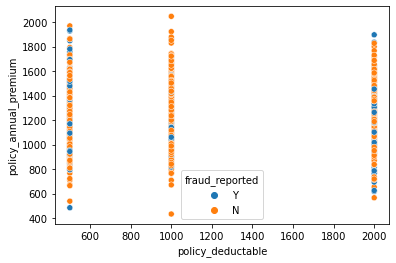

In [91]:
sb.scatterplot('policy_deductable','policy_annual_premium',hue='fraud_reported',data=df)

## capital loss and capital gain

<AxesSubplot:xlabel='capital-loss', ylabel='capital-gains'>

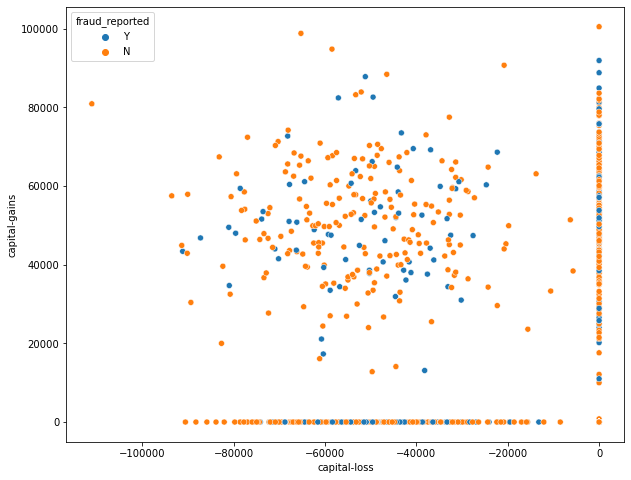

In [93]:
plt.figure(figsize=(10,8))
sb.scatterplot('capital-loss','capital-gains',hue='fraud_reported',data=df)

## injury_claim and total_claim_amount

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

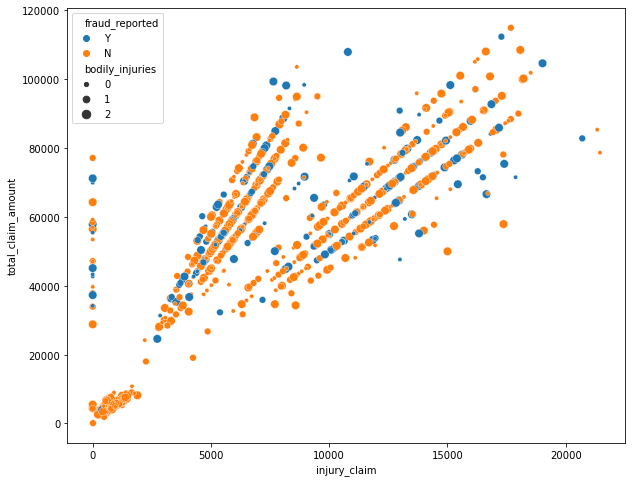

In [95]:
plt.figure(figsize=(10,8))
sb.scatterplot('injury_claim','total_claim_amount',hue='fraud_reported',size='bodily_injuries',data=df)

## property_claim and total_claim_amount

<AxesSubplot:xlabel='property_claim', ylabel='total_claim_amount'>

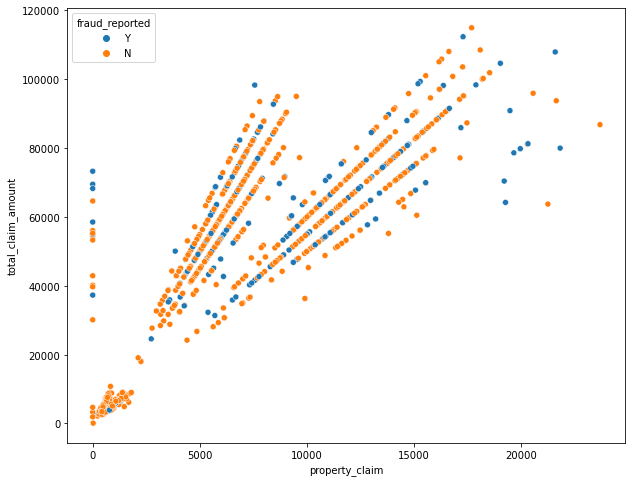

In [97]:
plt.figure(figsize=(10,8))
sb.scatterplot('property_claim','total_claim_amount',hue='fraud_reported',data=df)

### vehicle_claim and total_claim_amount

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

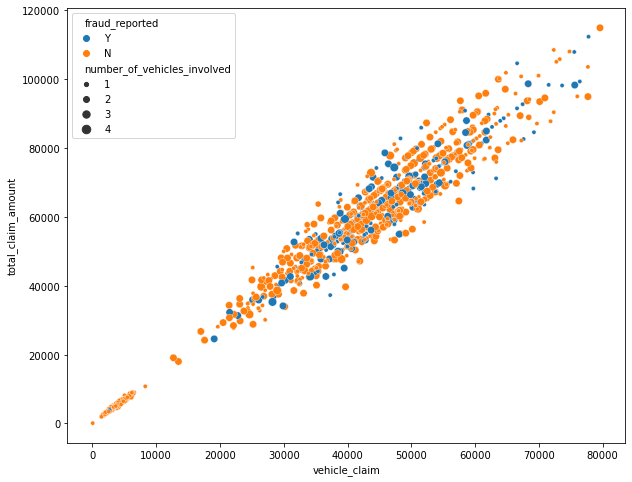

In [99]:
plt.figure(figsize=(10,8))
sb.scatterplot('vehicle_claim','total_claim_amount',hue='fraud_reported',size='number_of_vehicles_involved',data=df)

# categorical columns

In [106]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

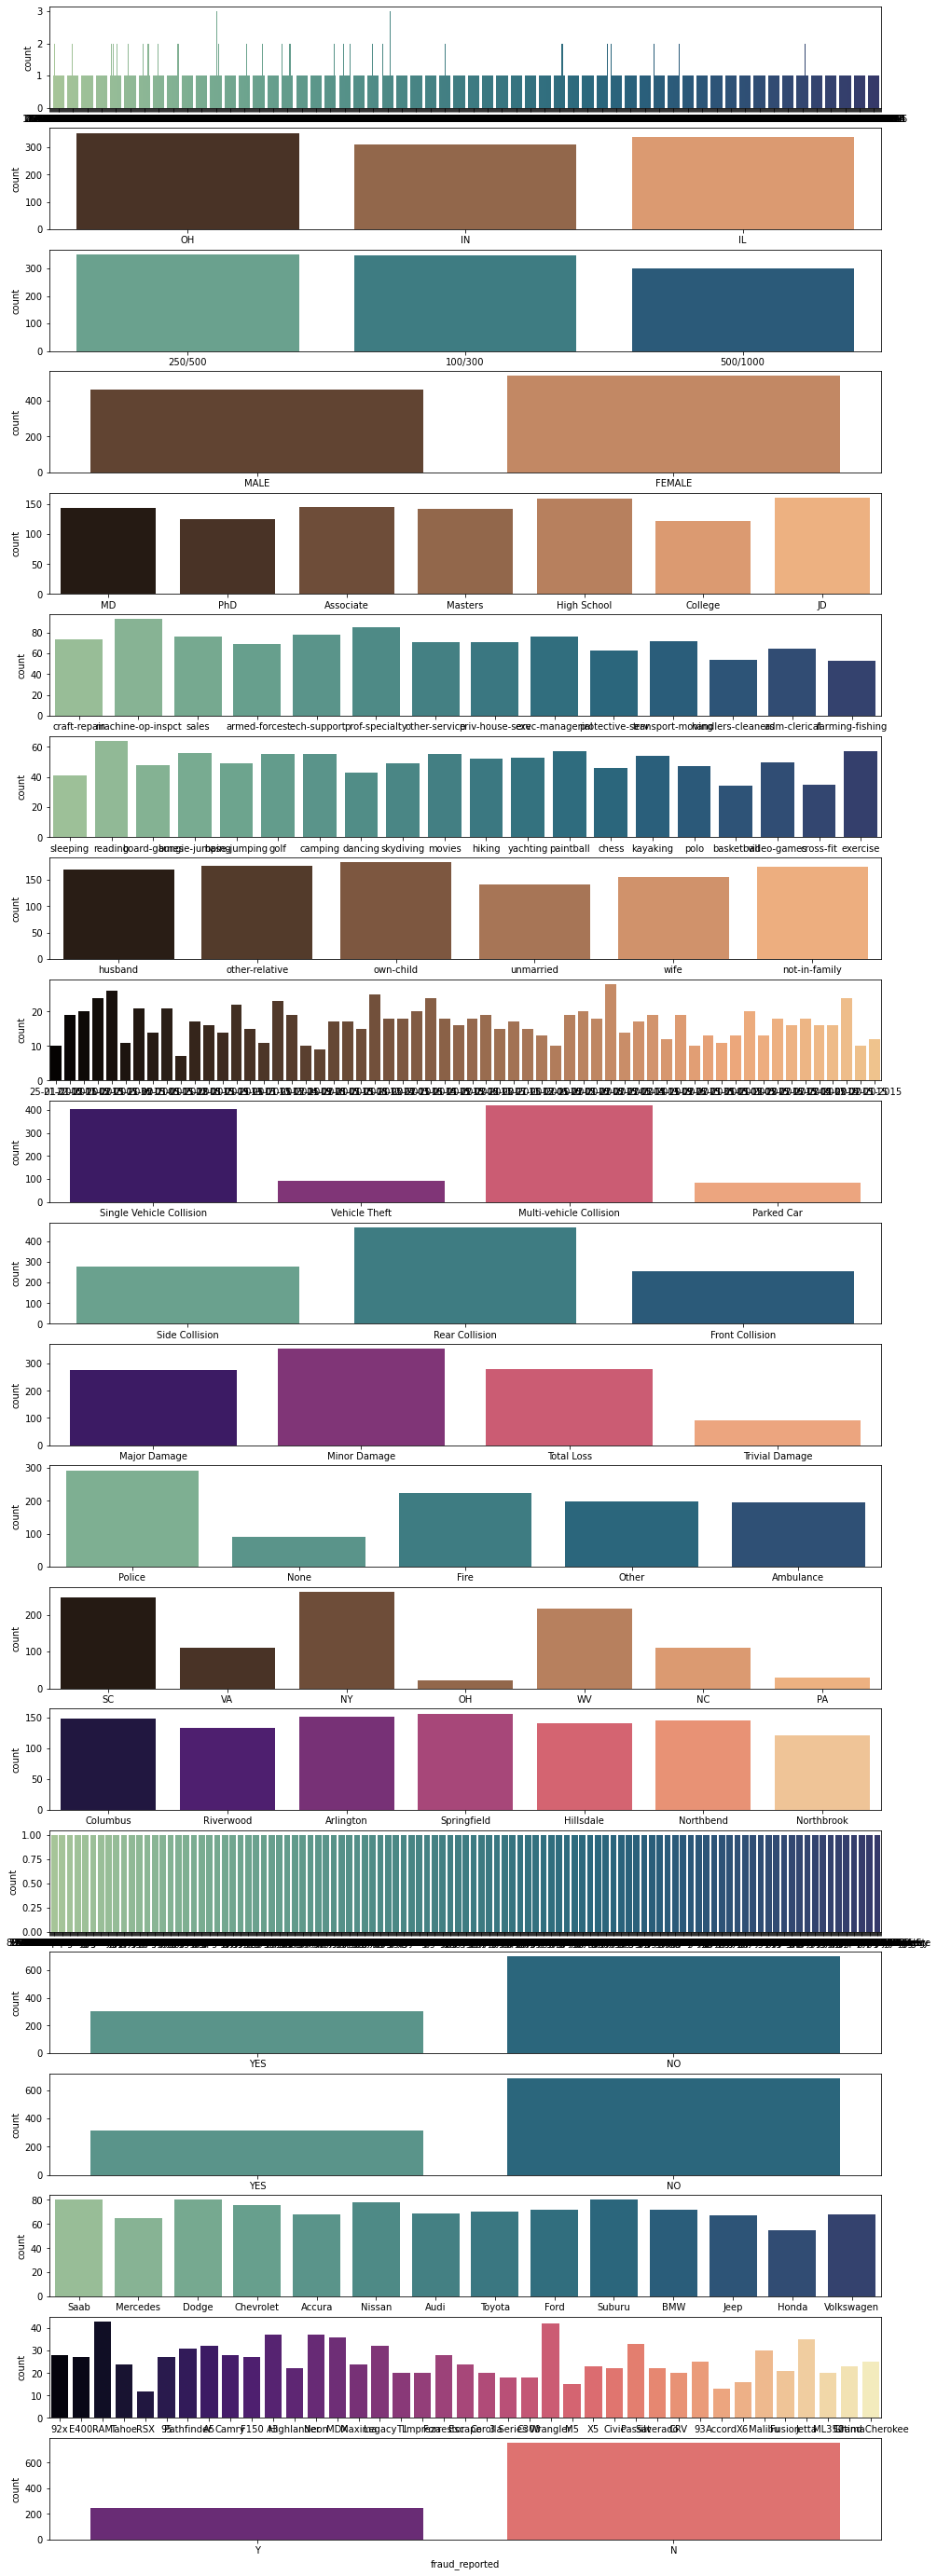

In [108]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[categorical].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(21,1,i+1)
    
    sb.countplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

# continous 

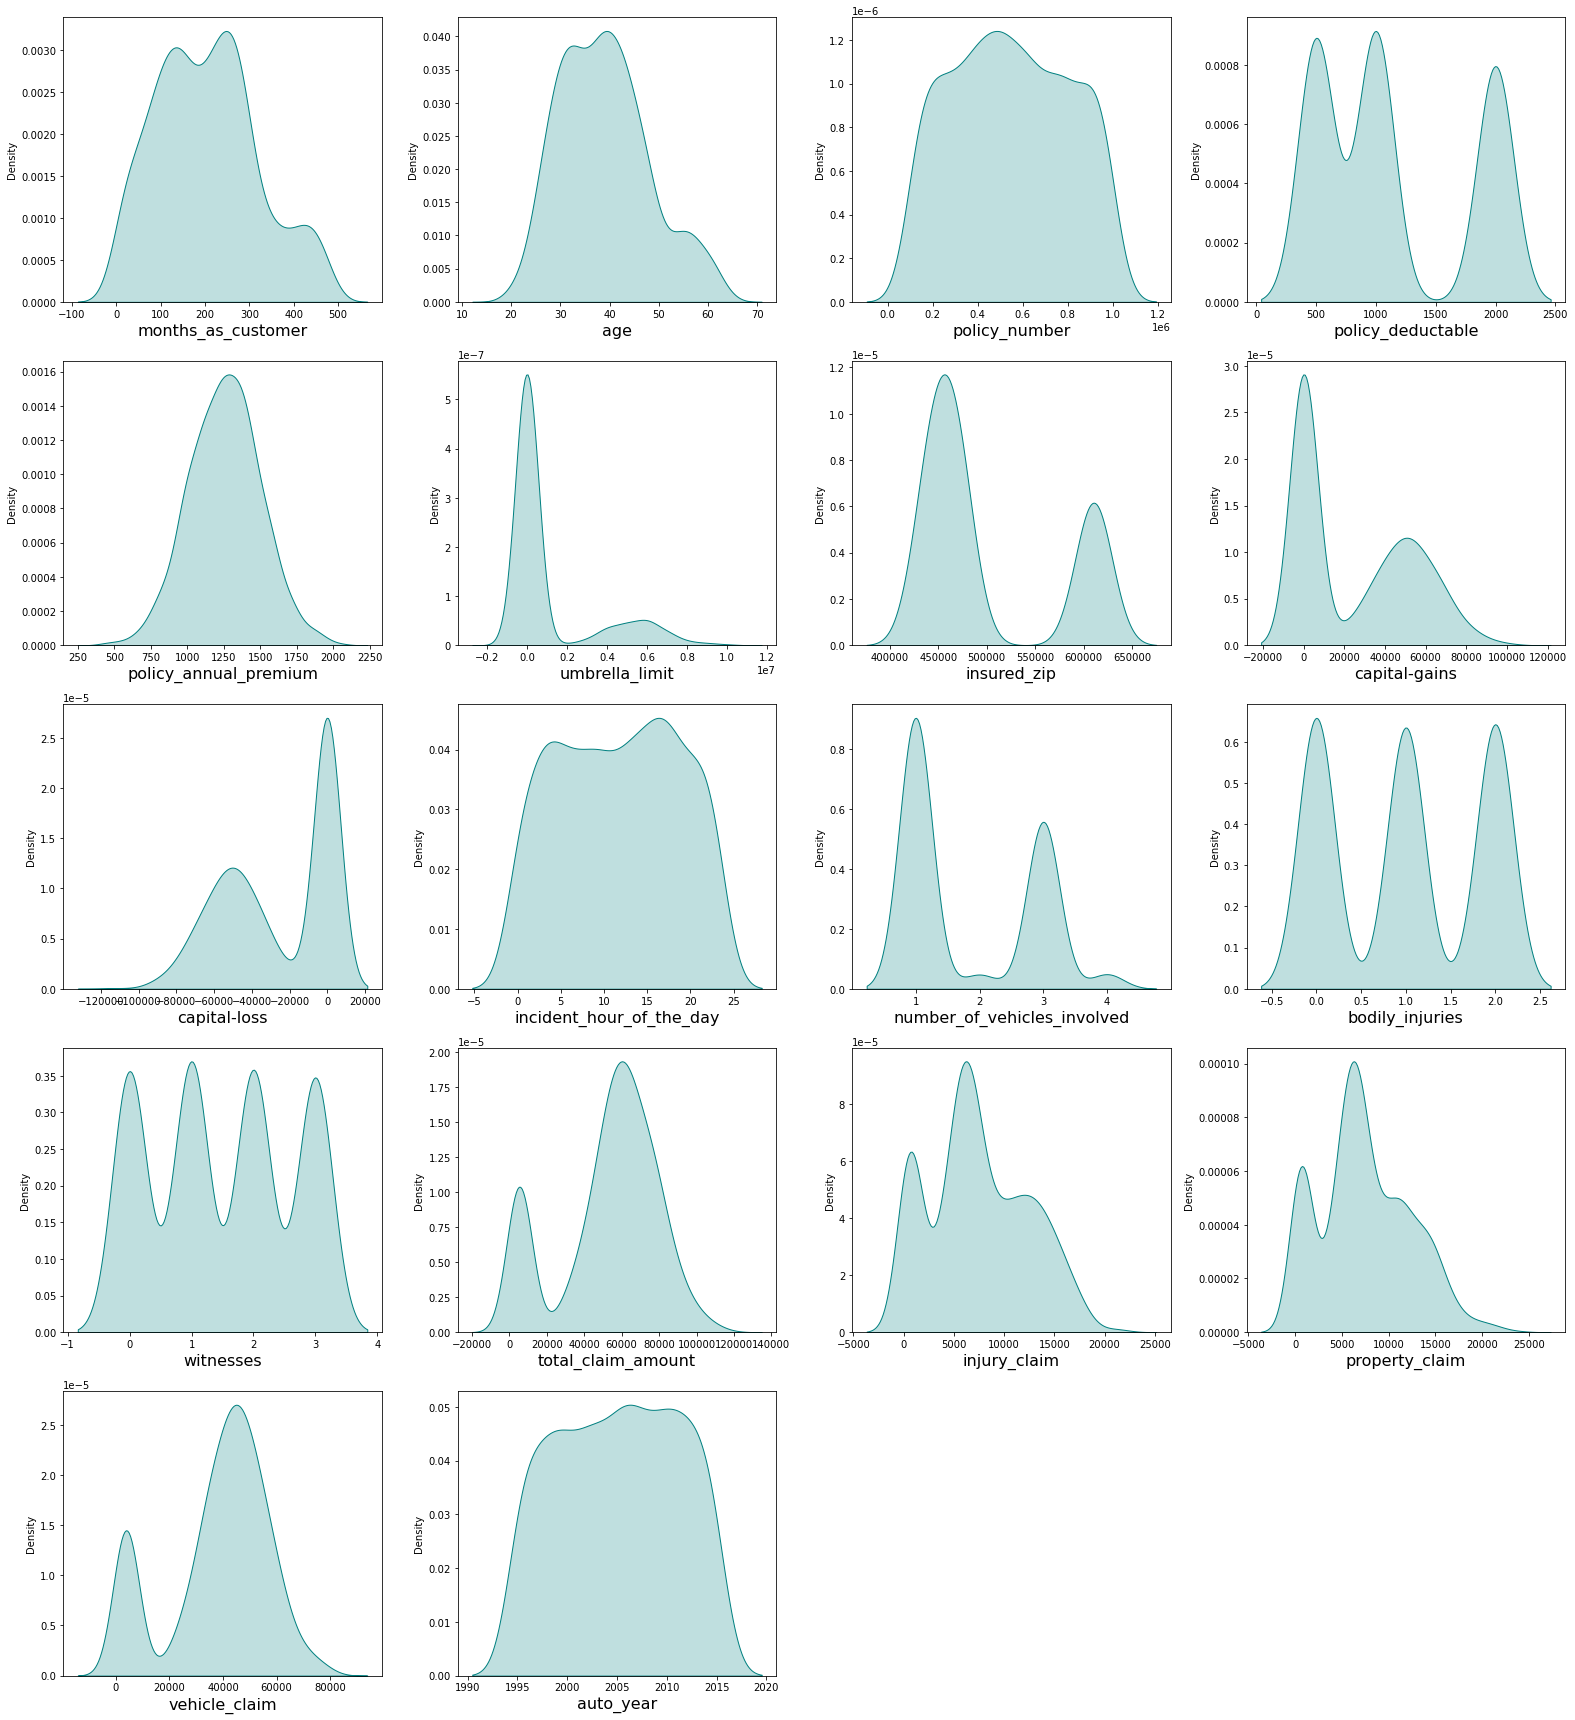

In [125]:
rand_color=color_[random.sample(range(6),1)[0]]

plt.figure(figsize=(22,24))
num=1

for columns in conti:
    
    if num<=20:
        ax=plt.subplot(5,4,num)
        sb.kdeplot(conti[columns],color=rand_color,fill=rand_color)
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

umberalla limit is little skewed
- although all other columns are bivariant or trivariant

so, i am just using power transformation for make data use for prediction 

## checking outliers

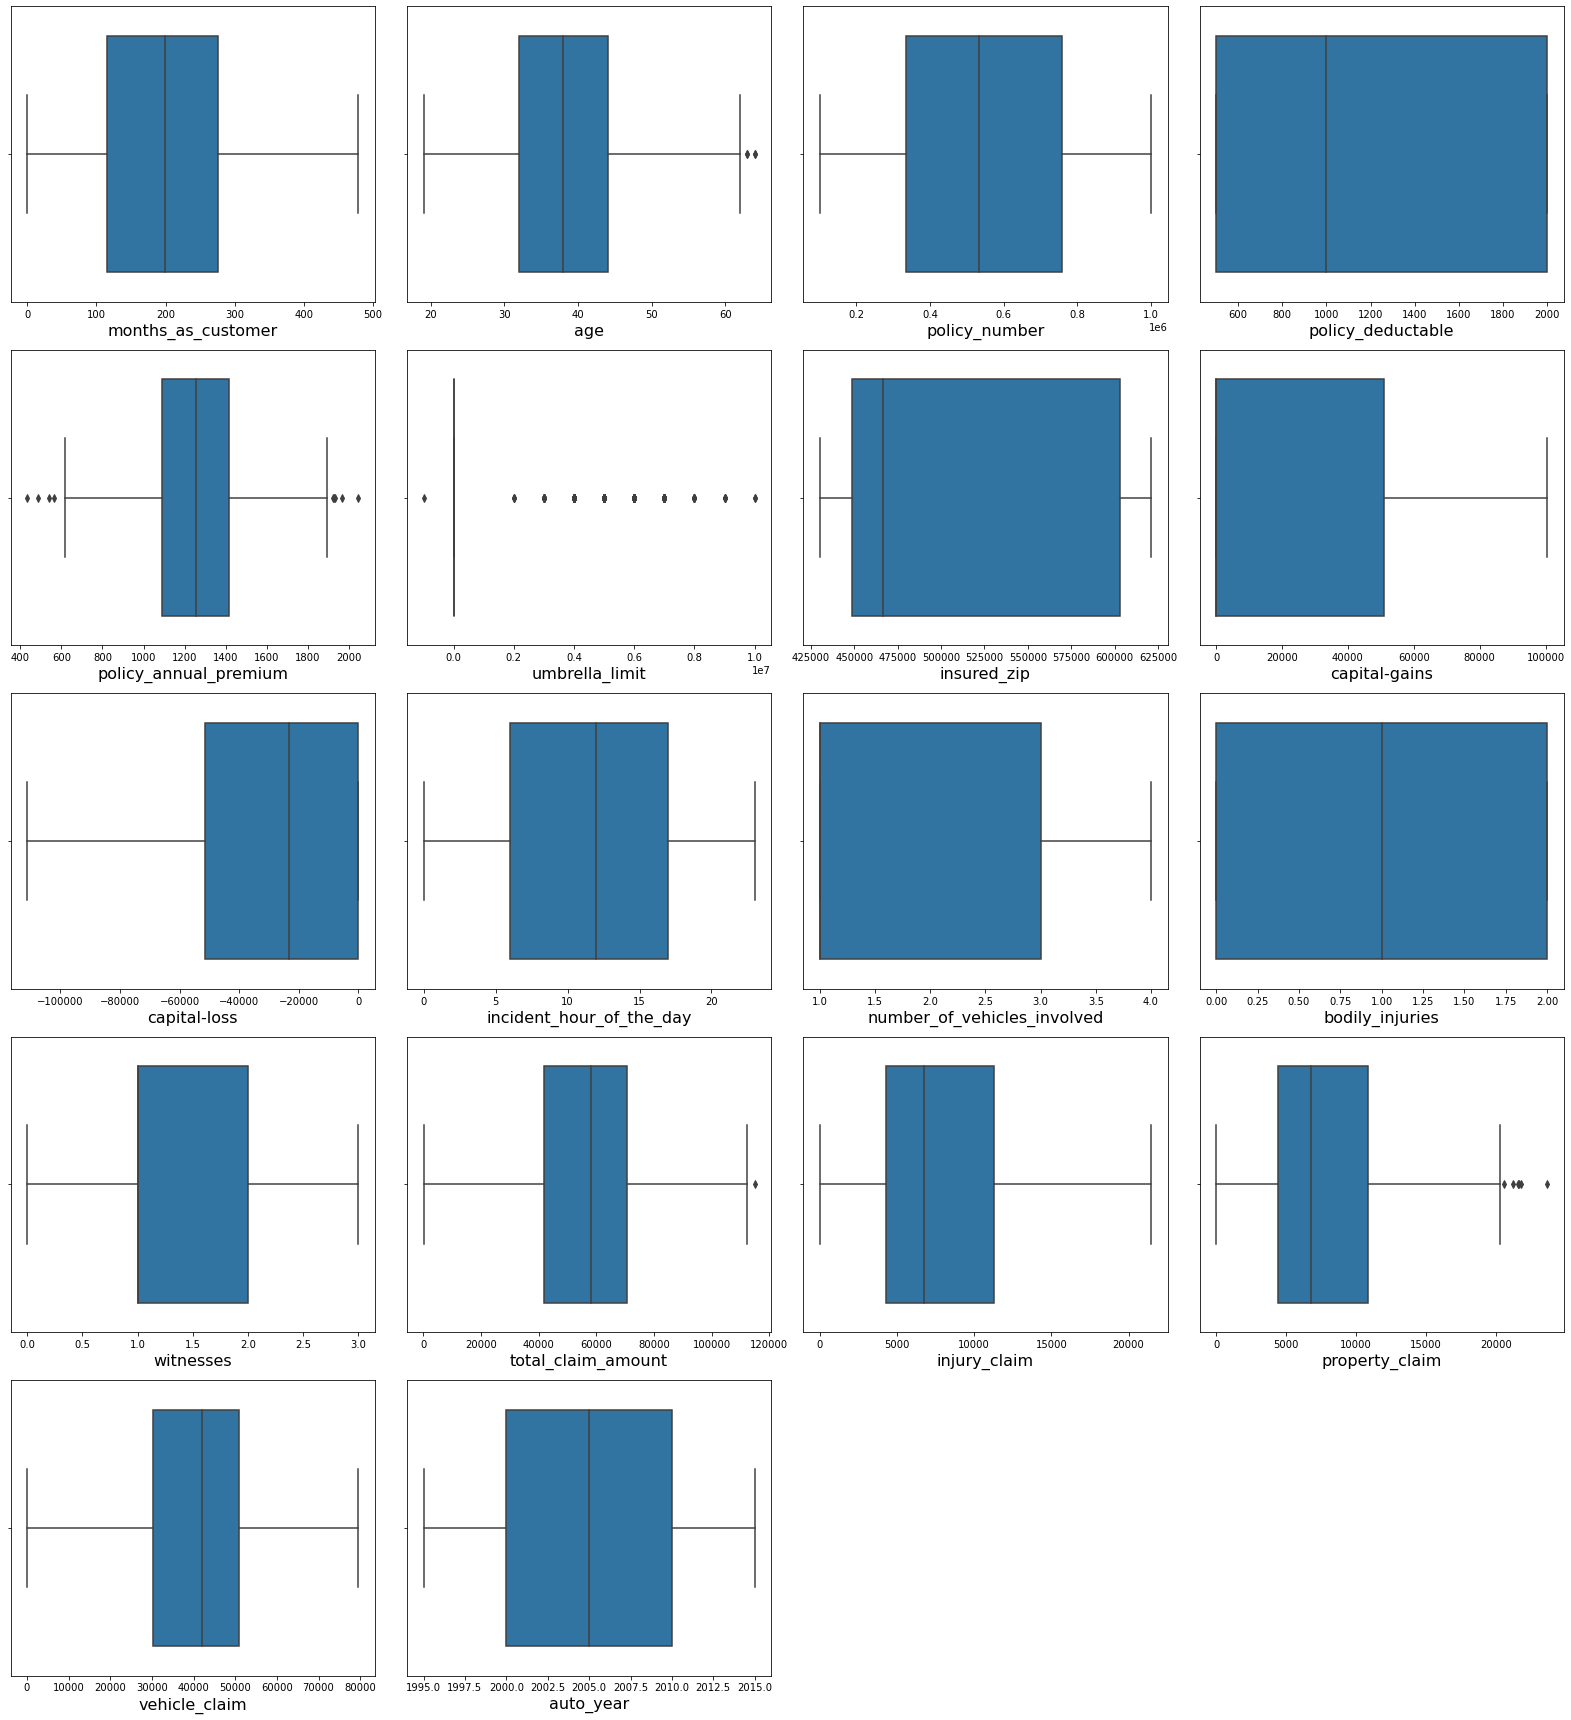

In [127]:
plt.figure(figsize=(22,24))
num=1

for columns in conti:
    
    if num<=20:
        ax=plt.subplot(5,4,num)
        sb.boxplot(conti[columns])
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

there are some of outliers in umberalla limit and some of on policy annual premium and some outliers on property claim

# correlation

In [128]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


<AxesSubplot:>

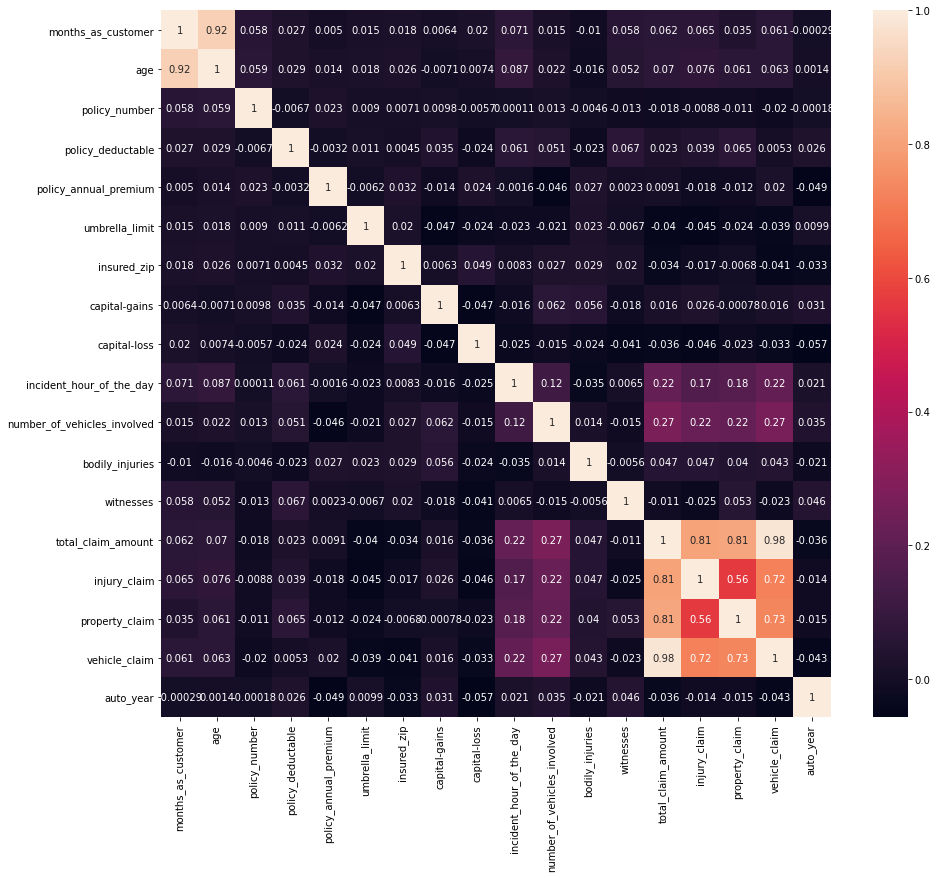

In [131]:
plt.figure(figsize=(15,13))
sb.heatmap(df.corr(),annot=True)

as per thresh limit:->=90

   - i can see here very precisely vechical claim and total claim amt has correlation of 0.98 and age with month as customer
   - injury claim and property claim also has strongest correlation of 0.81 with total claim amount
   - vechicel claim with injury claim and property claim also has strong correlation of 0.72, and 0.73
    
vechical claim and age has strong correlation with total claim amountand month as customer ,so we need to remove columns, as they are behaving multicolinearly.

# Feature engineering 

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
## dropping irrelevent columns 
['policy_number','policy_bind_date','insured_zip','incident_date', 'incident_location','policy_csl']

In [136]:
df.drop(columns=['policy_number','policy_bind_date','insured_zip','incident_date', 'incident_location','policy_csl'],axis=1,inplace=True)

In [140]:
print(len(df.columns))
cate.columns

33


Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [151]:
cate.drop(columns=['policy_bind_date','incident_date',
                   'incident_location','policy_csl','incident_date','incident_location'],axis=1,inplace=True)

In [152]:
for d in cate.columns:
    print(d,cate[d].unique())

policy_state ['OH' 'IN' 'IL']
insured_sex ['MALE' 'FEMALE']
insured_education_level ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_hobbies ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
insured_relationship ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_type ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
collision_type ['Side Collision' nan 'Rear Collision' 'Front Collision']
incident_severity ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
aut

In [158]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [160]:
# transforming the categorical columns
for d in cate.columns:
    cate[d]=le.fit_transform(cate[d])

In [165]:
for d in cate.columns:
    print(d,cate[d].unique())

policy_state [2 1 0]
insured_sex [1 0]
insured_education_level [4 6 0 5 2 1 3]
insured_occupation [ 2  6 11  1 12  9  7  8  3 10 13  5  0  4]
insured_hobbies [17 15  2  3  0  9  4  7 16 12 10 19 13  5 11 14  1 18  6  8]
insured_relationship [0 2 3 4 5 1]
incident_type [2 3 0 1]
collision_type [2 3 1 0]
incident_severity [0 1 2 3]
authorities_contacted [4 2 1 3 0]
incident_state [4 5 1 2 6 0 3]
incident_city [1 5 0 6 2 3 4]
property_damage [1 2 0]
police_report_available [1 2 0]
auto_make [10  8  4  3  0  9  1 12  5 11  2  7  6 13]
auto_model [ 1 12 30 34 31  3 29  5  9 14  4 18 27 23 26 21 33 19 15 13 11  0  7 36
 22 37 10 28 32  8  2  6 38 25 16 20 24 35 17]
fraud_reported [1 0]


### all categorical object changes into numeric

In [166]:
cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   policy_state             1000 non-null   int32
 1   insured_sex              1000 non-null   int32
 2   insured_education_level  1000 non-null   int32
 3   insured_occupation       1000 non-null   int32
 4   insured_hobbies          1000 non-null   int32
 5   insured_relationship     1000 non-null   int32
 6   incident_type            1000 non-null   int32
 7   collision_type           1000 non-null   int32
 8   incident_severity        1000 non-null   int32
 9   authorities_contacted    1000 non-null   int32
 10  incident_state           1000 non-null   int32
 11  incident_city            1000 non-null   int32
 12  property_damage          1000 non-null   int32
 13  police_report_available  1000 non-null   int32
 14  auto_make                1000 non-null   int32
 15  auto_

In [168]:
conti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   capital-gains                1000 non-null   int64  
 8   capital-loss                 1000 non-null   int64  
 9   incident_hour_of_the_day     1000 non-null   int64  
 10  number_of_vehicles_involved  1000 non-null   int64  
 11  bodily_injuries              1000 non-null   int64  
 12  witnesses                    1000 non-null   int64  
 13  total_claim_amount 

# Removing skewness and outliers

In [169]:
from sklearn.preprocessing import power_transform

In [174]:
skew_val=power_transform(conti)
skew_val


array([[ 1.05127872,  1.00873272, -0.02315574, ...,  1.08179312,
         0.75369677, -0.19745541],
       [ 0.30453584,  0.43143333, -0.74529151, ..., -1.55739143,
        -1.7866293 ,  0.30262249],
       [-0.51122603, -1.13951302,  0.58793118, ..., -0.57750678,
        -0.82088123,  0.30262249],
       ...,
       [-0.54970642, -0.47044379,  1.37330822, ...,  0.18609503,
         0.77723183, -1.49627768],
       [ 1.9126537 ,  2.13055434,  0.02397688, ..., -0.26501162,
        -0.10425834, -1.17624558],
       [ 1.90009963,  1.98572613,  0.10769485, ..., -1.49262878,
        -1.77908726,  0.30262249]])

In [175]:
conti_val=pd.DataFrame(skew_val)
conti_val.columns=conti.columns

In [176]:
conti_val

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,1.051279,1.008733,-0.023156,0.067784,0.616676,-0.349113,-5.551115e-16,1.033234,1.049532,-0.911676,-0.843679,0.108332,0.517616,0.715714,0.005762,1.081793,0.753697,-0.197455
1,0.304536,0.431433,-0.745292,1.271863,-0.242577,1.357817,-4.996004e-16,-0.982948,1.049532,-0.441383,-0.843679,-1.254857,-1.410682,-1.776979,-1.525347,-1.557391,-1.786629,0.302622
2,-0.511226,-1.139513,0.587931,1.271863,0.642206,1.357817,-1.720846e-15,0.960141,1.049532,-0.593040,1.189521,1.178068,1.290743,-0.716825,0.223833,-0.577507,-0.820881,0.302622
3,0.523344,0.327852,-1.266438,1.271863,0.652860,1.644005,2.164935e-15,1.018186,-1.005137,-0.911676,-0.843679,0.108332,0.517616,0.391426,-0.026762,-0.034793,0.677602,1.497810
4,0.304536,0.631918,-0.640684,0.067784,1.342030,1.644005,2.164935e-15,1.070503,-0.940361,1.151959,-0.843679,-1.254857,-0.355794,-1.729802,-1.304154,-1.622102,-1.740038,0.640027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.287530,0.002457,1.449469,0.067784,0.222833,-0.349113,-1.720846e-15,-0.982948,1.049532,1.151959,-0.843679,-1.254857,-0.355794,1.338829,1.638435,0.403281,1.259186,0.135129
996,0.741446,0.327852,-1.468221,0.067784,0.739122,-0.349113,2.164935e-15,1.082972,1.049532,1.508938,-0.843679,1.178068,1.290743,2.202447,1.717091,1.767003,1.904757,1.671841
997,-0.549706,-0.470444,1.373308,-1.211269,0.520703,0.756509,-1.276756e-15,0.960141,1.049532,-1.080756,1.189521,1.178068,1.290743,0.553012,0.188267,0.186095,0.777232,-1.496278
998,1.912654,2.130554,0.023977,1.271863,0.411823,1.357817,-1.276756e-15,-0.982948,1.049532,-1.447906,-0.843679,-1.254857,-0.355794,-0.247520,-0.251353,-0.265012,-0.104258,-1.176246


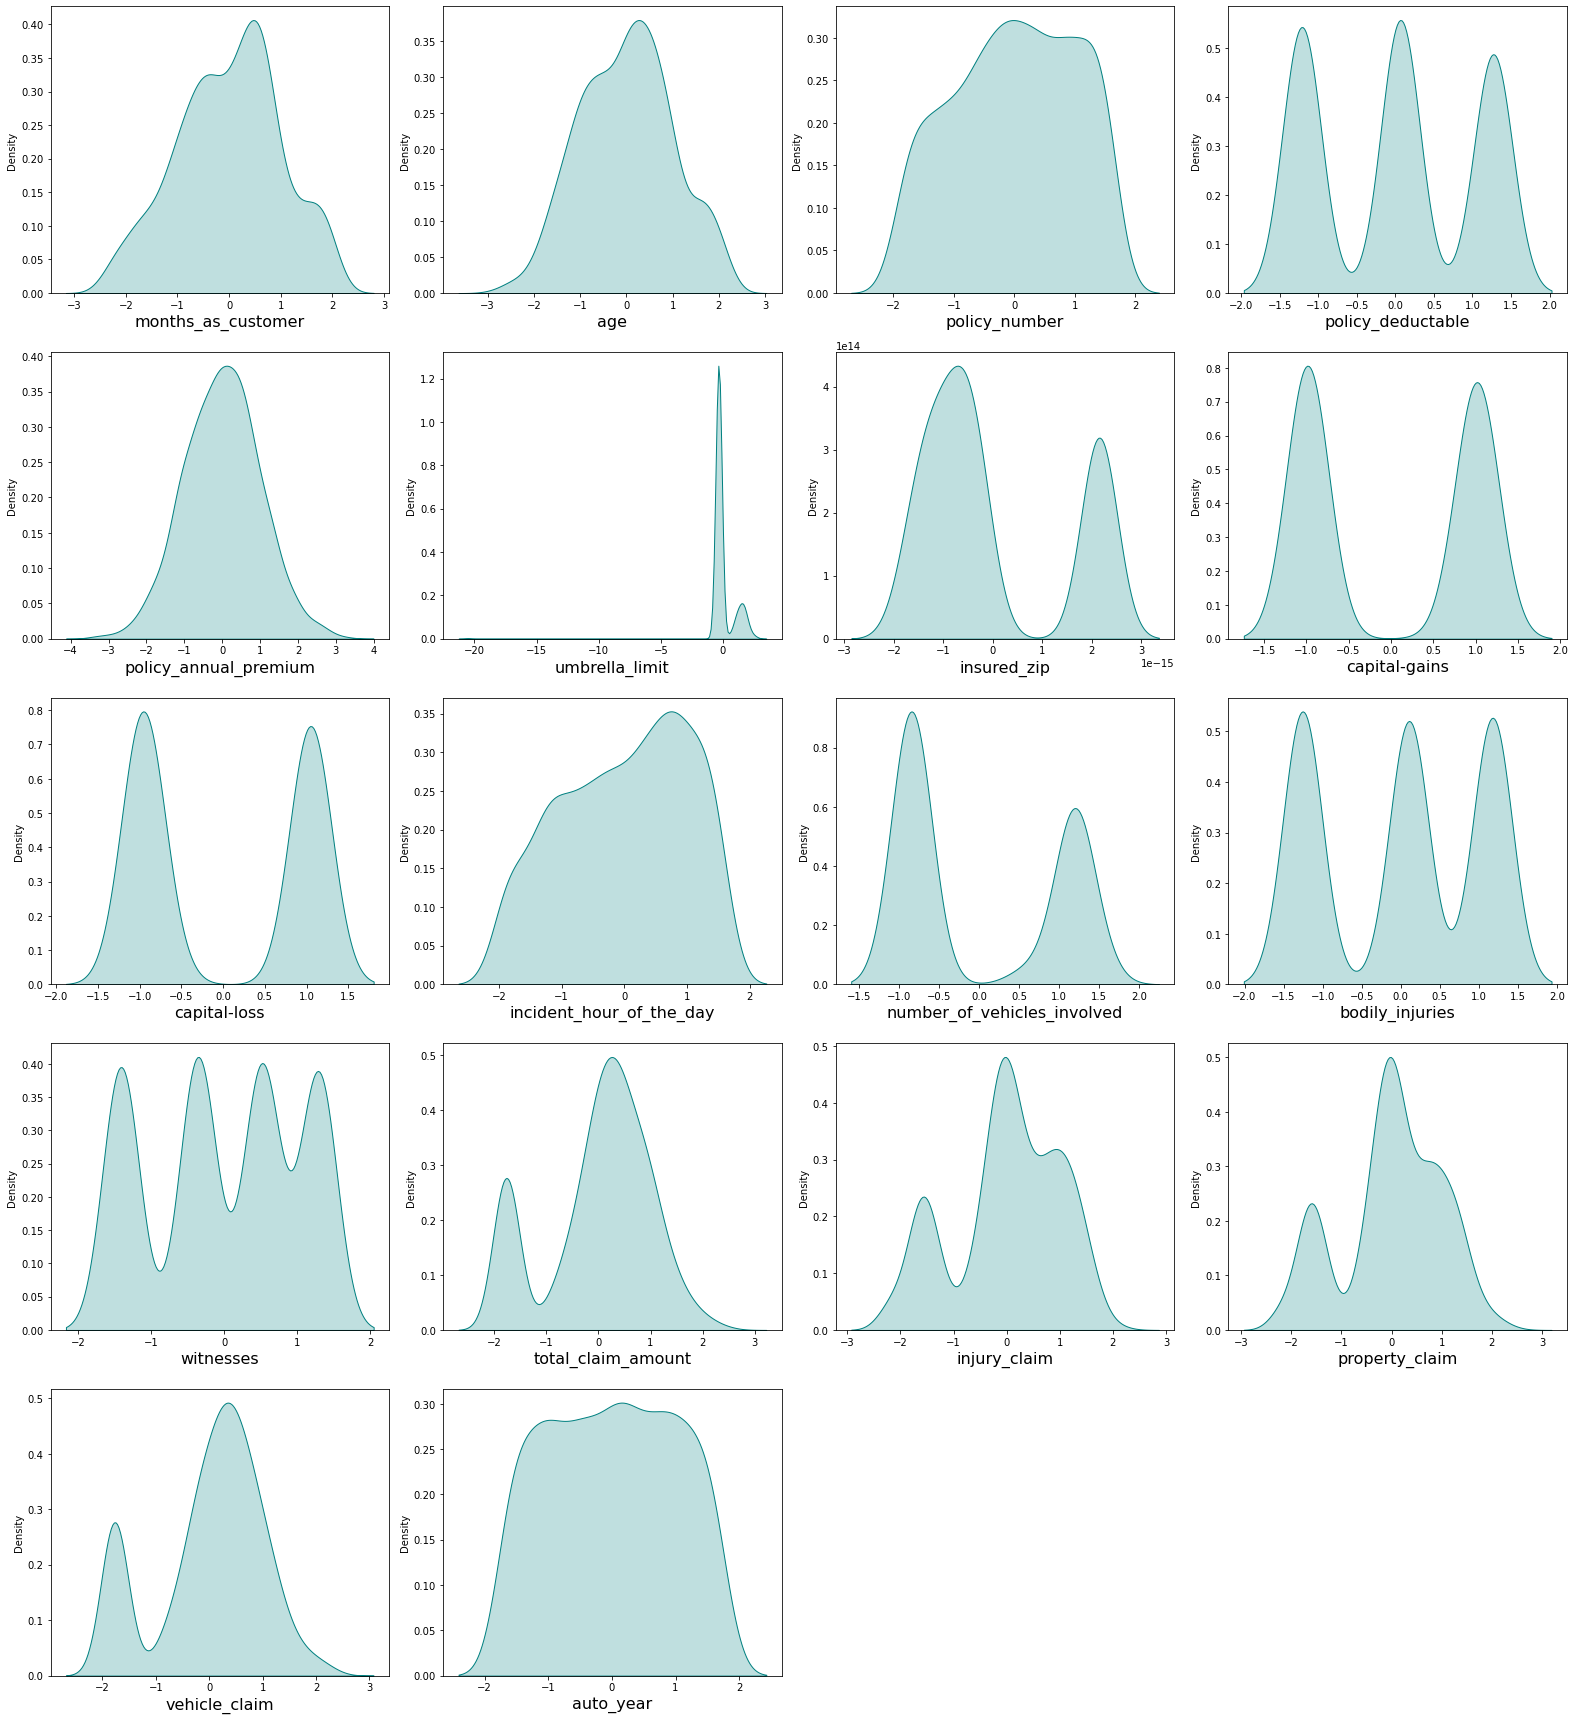

In [178]:
rand_color=color_[random.sample(range(6),1)[0]]

plt.figure(figsize=(22,24))
num=1

for columns in conti_val:
    
    if num<=20:
        ax=plt.subplot(5,4,num)
        sb.kdeplot(conti_val[columns],color=rand_color,fill=rand_color)
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

we see here umbrella limit value is highly skewed, so i am using previous one only.

may be its just outliers which can be removed let's see

In [179]:
from scipy.stats import zscore

In [192]:
z=np.abs(zscore(conti))
z


array([[1.07813958, 0.99083647, 0.09595307, ..., 1.16550497, 0.74965272,
        0.1834404 ],
       [0.2089946 , 0.33407345, 0.79152739, ..., 1.37269599, 1.82334593,
        0.31549088],
       [0.60800168, 1.08891308, 0.55056594, ..., 0.73607206, 0.78556451,
        0.31549088],
       ...,
       [0.64276748, 0.54161057, 1.44891961, ..., 0.0208261 , 0.77190224,
        1.5139238 ],
       [2.20802805, 2.52328351, 0.04786687, ..., 0.45197603, 0.07357971,
        1.18130295],
       [2.19064515, 2.3043625 , 0.03830297, ..., 1.34366428, 1.81434017,
        0.31549088]])

In [193]:
print(np.where(z>3))
len(np.where(z>3)[0])

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 15,  5,  5,  5,  4,  8,
        5,  5,  5], dtype=int64))


20

In [196]:
v=np.where(z>3)[0]
clean_conti=conti[(z<3).all(axis=1)]
clean_conti

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


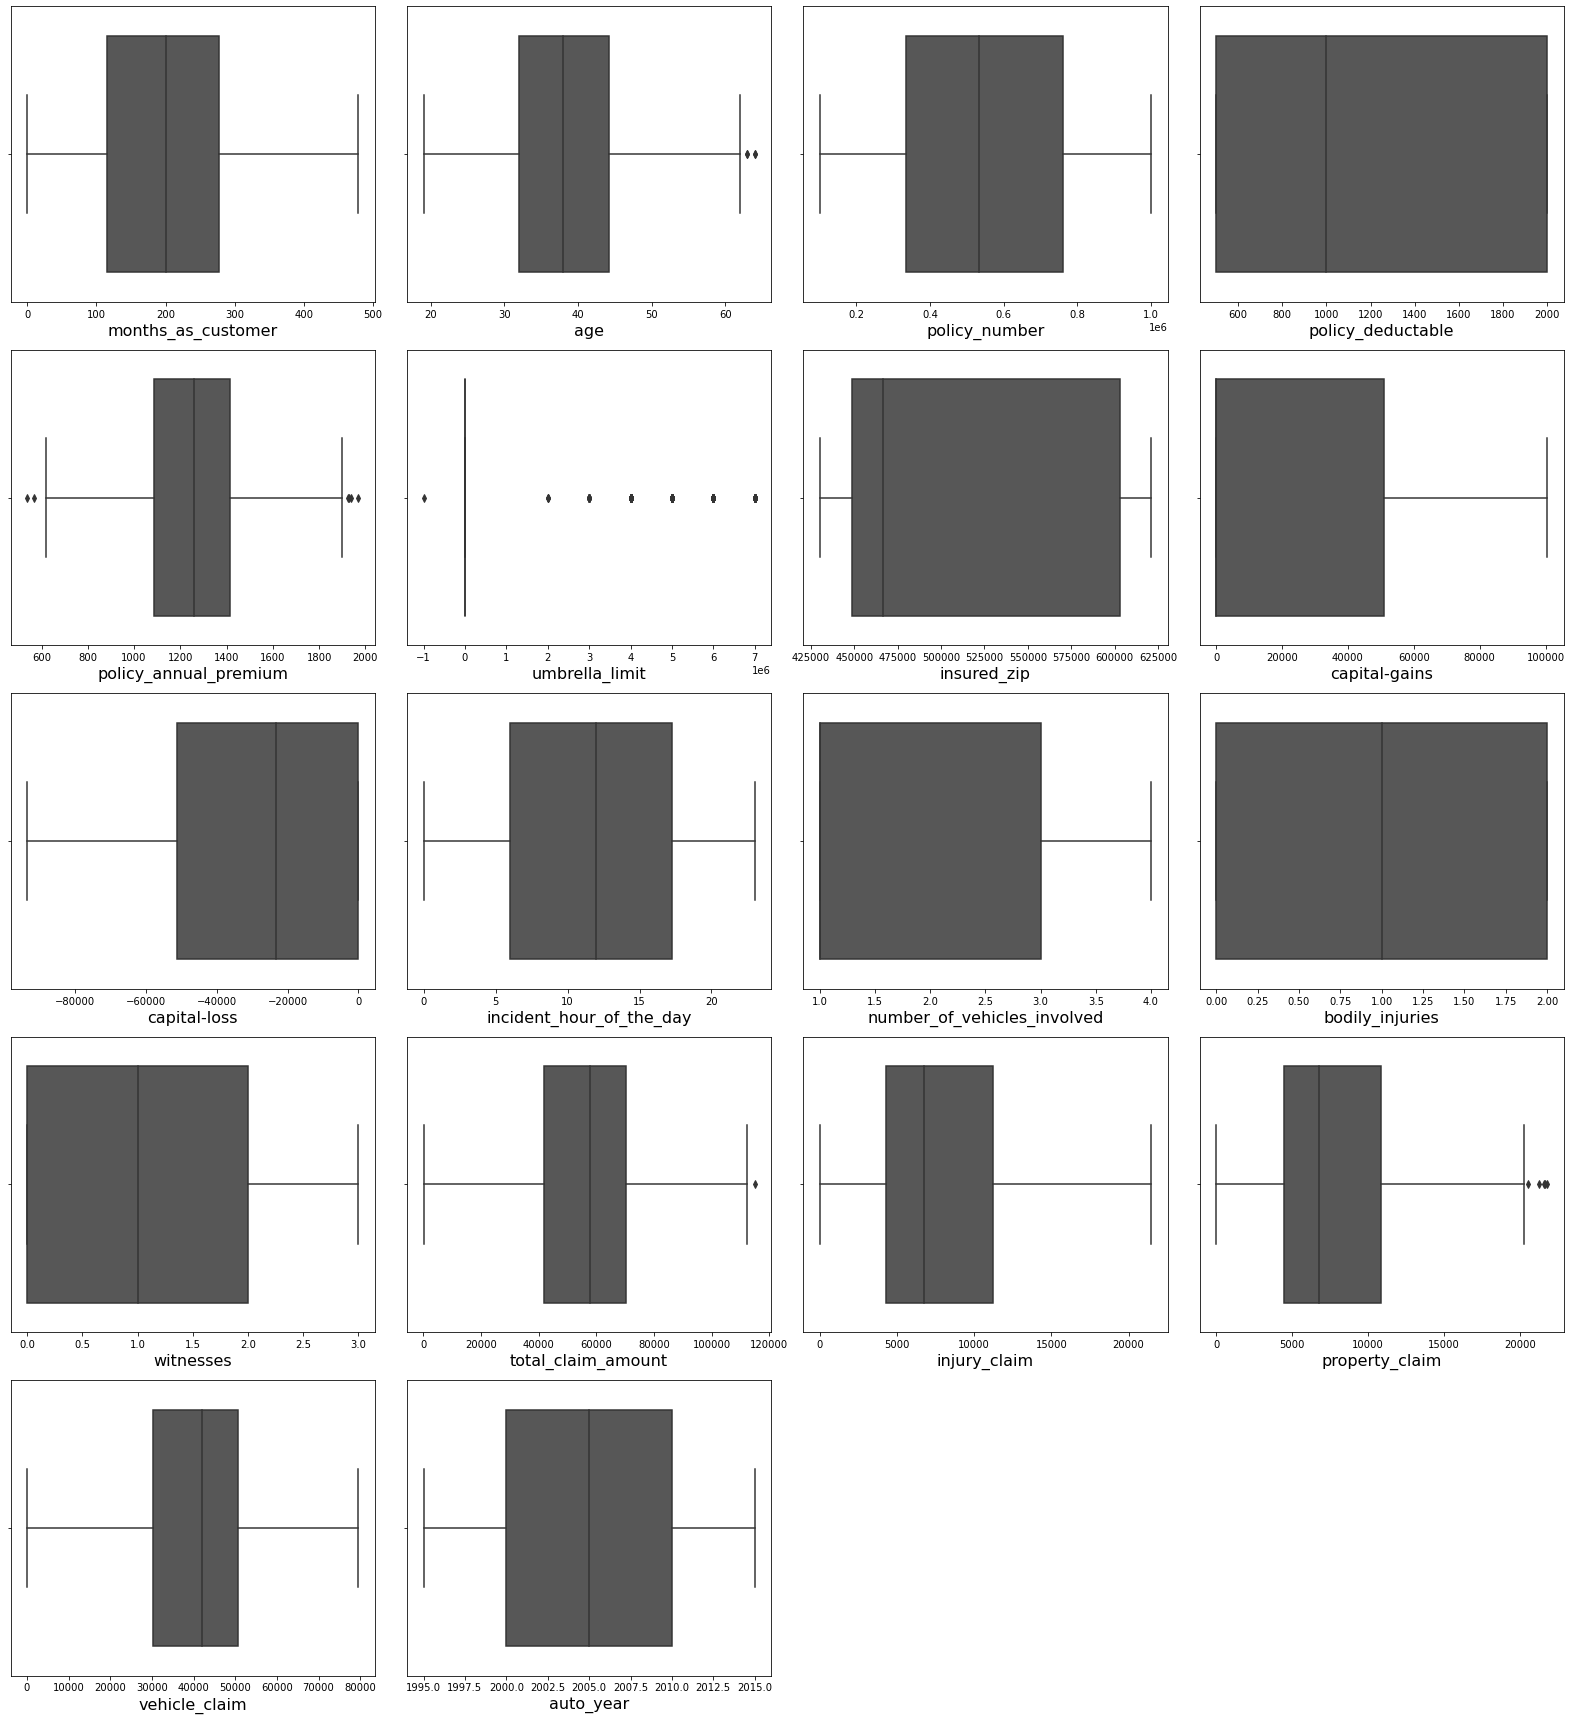

In [195]:
rand_color=color_[random.sample(range(6),1)[0]]

plt.figure(figsize=(22,24))
num=1

for columns in clean_conti:
    
    if num<=20:
        ax=plt.subplot(5,4,num)
        sb.boxplot(clean_conti[columns],color=rand_color)
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

if we see here the outliers is decreased, although we see it still has some of left but thats ok it is in regular interval so we can use it for prediction 

In [198]:
cate.drop(index=v,axis=0,inplace=True)

In [200]:
the_new_df=pd.concat([clean_conti,cate],axis=1,join='inner')

In [203]:
df.columns
len(df.columns)

33

In [204]:
the_new_df.columns
len(the_new_df.columns)

35

In [206]:
the_new_df.drop(columns=['policy_number','insured_zip'],axis=1,inplace=True)

In [209]:
len(the_new_df.columns) , len(df.columns)# now it is equal 

(33, 33)

# Checking VIF

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [211]:
X=the_new_df.drop('fraud_reported',axis=1)


In [213]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
12,injury_claim,inf
14,vehicle_claim,inf
13,property_claim,inf
11,total_claim_amount,inf
15,auto_year,170.606086
1,age,131.263724
3,policy_annual_premium,28.807366
0,months_as_customer,28.586454
8,number_of_vehicles_involved,21.716890
22,incident_type,11.203507


# Feature selection :-

In [214]:
from sklearn.feature_selection import SelectKBest,f_classif

In [215]:
x=the_new_df.drop(['fraud_reported'],axis=1)
y=the_new_df['fraud_reported']

In [217]:
feature_selector=SelectKBest(score_func=f_classif,k=10)
fit=feature_selector.fit(x,y)

In [218]:
df_score =pd.DataFrame(fit.scores_)
df_score
df_columns=pd.DataFrame(x.columns)
feature_score=pd.concat([df_columns,df_score],axis=1)
feature_score.columns=['features','score']

In [219]:
feature_score

,features,score
0,months_as_customer,0.443301
1,age,0.172474
2,policy_deductable,0.243395
3,policy_annual_premium,0.157431
4,umbrella_limit,1.960578
5,capital-gains,0.219885
6,capital-loss,0.303614
7,incident_hour_of_the_day,0.018303
8,number_of_vehicles_involved,1.857101
9,bodily_injuries,1.503921


# Balancing Dataset

In [220]:
y.value_counts(normalize=True)*100

0    75.510204
1    24.489796
Name: fraud_reported, dtype: float64

In [221]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [223]:
n_x,n_y=sm.fit_resample(x,y)

# Training Data

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

In [226]:
max_accu=0
max_RS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(n_x,n_y,random_state=i,test_size=.20)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accu:
        max_accu=acc
        max_RS=i
print("Best accuracy is ",max_accu,"on Random State =",max_RS)

Best accuracy is  0.6283783783783784 on Random State = 102


In [227]:
x_train,x_test,y_train,y_test= train_test_split(n_x,n_y,random_state=102,test_size=.20)

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier

In [230]:
lr_model=LogisticRegression()
dt_model=DecisionTreeClassifier()
svc_model=SVC()
knn_model=KNeighborsClassifier()
rd_model=RandomForestClassifier()
xgb_model=XGBClassifier()
sdg_model=SGDClassifier()
bag_model=BaggingClassifier()
ada_model=AdaBoostClassifier()
gd_model=GradientBoostingClassifier()
et_model=ExtraTreeClassifier()
nural_model=MLPClassifier()

In [231]:
models=[lr_model,dt_model,svc_model,knn_model,rd_model,xgb_model,sdg_model,bag_model,ada_model,gd_model,et_model,nural_model]

In [232]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of ',m, 'is', accuracy_score(y_test,predict))
    print("F1 Score", f1_score(y_test,predict))
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,predict))
    print('Classification_report',classification_report(y_test,predict))
    print('*******************************************')

Accuracy Score of  LogisticRegression() is 0.6283783783783784
F1 Score 0.6428571428571429
Confusion Matrix of  LogisticRegression()  is 
 [[87 53]
 [57 99]]
Classification_report               precision    recall  f1-score   support

           0       0.60      0.62      0.61       140
           1       0.65      0.63      0.64       156

    accuracy                           0.63       296
   macro avg       0.63      0.63      0.63       296
weighted avg       0.63      0.63      0.63       296

*******************************************
Accuracy Score of  DecisionTreeClassifier() is 0.8175675675675675
F1 Score 0.830188679245283
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[110  30]
 [ 24 132]]
Classification_report               precision    recall  f1-score   support

           0       0.82      0.79      0.80       140
           1       0.81      0.85      0.83       156

    accuracy                           0.82       296
   macro avg       0.82      0.82      0.8

# Cross validation

In [233]:
from sklearn.model_selection import cross_val_score

In [234]:
for i in models:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test)))
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,n_x,n_y,cv=8, scoring='accuracy').mean())
    print('@'*50)

Accuracy_Score of  LogisticRegression() is 0.6283783783783784
cross Validation accuracy score of  LogisticRegression()  is  0.5695945945945946
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  DecisionTreeClassifier() is 0.8175675675675675
cross Validation accuracy score of  DecisionTreeClassifier()  is  0.8135135135135134
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  SVC() is 0.5101351351351351
cross Validation accuracy score of  SVC()  is  0.5256756756756757
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  KNeighborsClassifier() is 0.7668918918918919
cross Validation accuracy score of  KNeighborsClassifier()  is  0.7236486486486486
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  RandomForestClassifier() is 0.8412162162162162
cross Validation accuracy score of  RandomForestClassifier()  is  0.8594594594594596
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  XGBClassifier(base_sc

Here i am selection GradientBoostingClassifier

- accuracy_Score of  GradientBoostingClassifier() is 0.8716216216216216
- cross Validation accuracy score of  GradientBoostingClassifier()  is  0.8628378378378379

In here we see 0.008783 as per round figure 0.08 flucatuation .

# Hyperparameter Tuning

In [ ]:
GradientBoostingClassifier()

In [236]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#### Test1

In [307]:
param_test1 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10),param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=9,
                                                  max_features='sqrt',
                                                  n_estimators=60,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'min_samples_leaf': range(30, 71, 10),
                         'min_samples_split': range(1000, 2100, 200)},
             scoring='roc_auc')

In [308]:
gsearch1.best_params_, gsearch1.best_score_

({'min_samples_leaf': 30, 'min_samples_split': 1000}, 0.5)

In [309]:
ped=gsearch1.predict(x_test)
accuracy_score(y_test,pred)

0.8040540540540541

#### Test2

In [310]:
param_test2 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=7),
param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(x_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

({'subsample': 0.6}, 0.5)

In [311]:
gsearch2.fit(x_train,y_train)
ped2=gsearch2.predict(x_test)

In [313]:
accuracy_score(y_test,ped2)

0.47297297297297297

### dropping off the columns having multicolinearity problem

In [304]:
x.drop('age',axis=1,inplace=True)

In [306]:
x.drop('total_claim_amount',axis=1,inplace=True)

In [278]:
random.best_params_

{'subsample': 0.6,
 'n_estimators': 20,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 5,
 'loss': 'deviance',
 'learning_rate': 0.05,
 'criterion': 'friedman_mse'}

In [279]:
pred=random.predict(x_test)
accuracy_score(y_test,pred)

0.8040540540540541

In [260]:
GD=GradientBoostingClassifier(subsample=0.7,
n_estimators=15,
min_samples_leaf=4,
max_features='sqrt',
max_depth=3,
loss='exponential',
learning_rate=0.1,
criterion='friedman_mse')

In [261]:
GD.fit(x_train,y_train)

GradientBoostingClassifier(loss='exponential', max_features='sqrt',
                           min_samples_leaf=4, n_estimators=15, subsample=0.7)

In [263]:
GD_predict=GD.predict(x_test)

In [264]:
accuracy_score(y_test,GD_predict)

0.7837837837837838

#### so, its not improving i am selecting and saving earlier models here 

## plot roc auc curve

In [319]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

In [320]:
for m in models:
    m.fit(x_train,y_train)

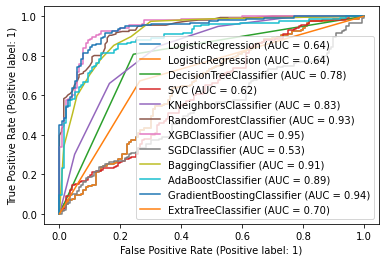

In [322]:
dist=plot_roc_curve(lr_model,x_test,y_test,)
plot_roc_curve(lr_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(dt_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(svc_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(knn_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(rd_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(xgb_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(sdg_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(bag_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(ada_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(gd_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(et_model,x_test,y_test,ax=dist.ax_) ;


#### GradientBoostingClassifier == (auc=0.94)

In [327]:
rd_model.fit(x_train,y_train)
rd_model_predict=rd_model.predict(x_test)
confusion_matrix(y_test,rd_model_predict)

array([[123,  17],
       [ 34, 122]], dtype=int64)

<AxesSubplot:>

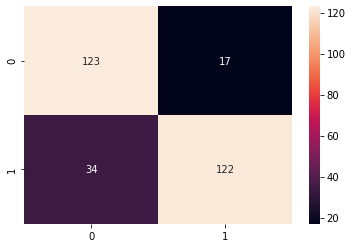

In [328]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sb.heatmap(confusion_matrix(y_test,rd_model_predict),annot=True, fmt='d')

# saving model

In [323]:
import pickle
file_name='Insurance Claims- Fraud Detection'
with open(file_name,'wb') as file:
    pickle.dump(gd_model,file)